In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data_path=Path("../Data/FeatureEngineering/feature_engineered_data.csv")
df = pd.read_csv(data_path)
with open('../Data/FeatureEngineering/feature_engineering_metadata.pkl', 'rb') as f:
    loaded_metadata = pickle.load(f)
print(loaded_metadata)

{'class_labels': {'Apple': np.int64(0), 'Banana': np.int64(1), 'Burger': np.int64(2), 'Donut': np.int64(3), 'Ice Cream': np.int64(4), 'Pasta': np.int64(5), 'Pizza': np.int64(6), 'Salad': np.int64(7), 'Steak': np.int64(8), 'Sushi': np.int64(9)}, 'classes': ['Apple', 'Banana', 'Burger', 'Donut', 'Ice Cream', 'Pasta', 'Pizza', 'Salad', 'Steak', 'Sushi'], 'selected_features': ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_breakfast', 'Meal_dinner', 'Meal_lunch', 'Meal_snack', 'Prep_baked', 'Prep_fried', 'Prep_grilled', 'Prep_raw'], 'trained_scaler': StandardScaler(), 'label_encoder': LabelEncoder()}


Train Accuracy: 0.9957784061491896
Test Accuracy: 0.9958585536795158
Precision (Weighted): 0.9959
Recall (Weighted): 0.9959
F1-score (Weighted): 0.9959

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       311
           1       1.00      0.99      0.99       222
           2       0.99      0.99      0.99       969
           3       1.00      1.00      1.00       929
           4       1.00      1.00      1.00       606
           5       1.00      1.00      1.00       825
           6       0.99      0.99      0.99      1153
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       393
           9       1.00      1.00      1.00       671

    accuracy                           1.00      6278
   macro avg       1.00      1.00      1.00      6278
weighted avg       1.00      1.00      1.00      6278

Scores for each fold: [0.99561928 0.99462366 0.99601752 0.994623

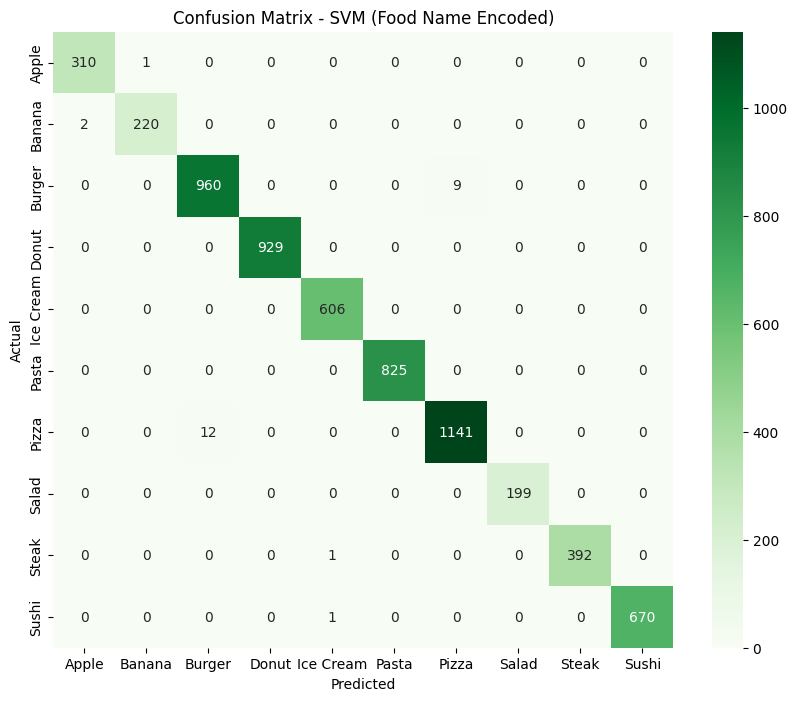

In [4]:
target_col = 'Food_Name_Encoded'
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

accuracy = test_accuracy

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

target_names = loaded_metadata['classes']

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", class_report)

scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Food Name Encoded)')
plt.savefig('svm_multiclass_confusion_matrix.png')

# Output metrics
results = {
    "test_accuracy": accuracy,
    "train_accuracy": train_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "classification_report": class_report,
    "cross_val_scores": scores,
    "cross_val_mean": scores.mean(),
    "cross_val_std": scores.std(),
     "confusion_matrix": conf_matrix
}
print(results)

In [5]:
SVM_model={
    'model':svm_model,
    'results':results
}
with open('../Models/svm_model.pkl', 'wb') as f:
    pickle.dump(SVM_model, f)

In [6]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from predict import predict_food
predict_food(svm_model,{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 0,'Prep_raw': 1})
test=pd.DataFrame([{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 0,'Prep_raw': 1}])
svm_model.predict_proba(test)

{'model': LogisticRegression(max_iter=1000, random_state=42)}
   Calories   Protein       Fat    Carbs     Sugar     Fiber    Sodium  \
0 -0.789107 -1.479211 -1.861875  0.09932  3.415151 -1.372714 -1.167916   

   Cholesterol  Glycemic_Index  Water_Content  ...  Is_Vegan  Is_Gluten_Free  \
0    -1.460341       -2.068807       1.063572  ...         0               0   

   Meal_breakfast  Meal_dinner  Meal_lunch  Meal_snack  Prep_baked  \
0               0            0           0           1           0   

   Prep_fried  Prep_grilled  Prep_raw  
0           0             0         1  

[1 rows x 21 columns]


array([[5.97299769e-07, 4.91917197e-07, 1.20936663e-06, 9.99402803e-01,
        4.31507441e-04, 3.31356208e-06, 1.08729069e-06, 6.44715301e-05,
        8.85827465e-05, 5.93632693e-06]])

In [7]:
prediction=svm_model.predict(test)
print("prediction result:",prediction[0])
# 1. Get the probabilities
probs = svm_model.predict_proba(test)[0]
food_names = ["Apple", "Banana", "Burger", "Donut", "Ice Cream", "Pasta", "Pizza", "Salad", "Steak", "Sushi"]

result_list = [
    {"label": food_names[i], "probability": round(float(probs[i]), 4)} 
    for i in range(len(probs))
]

test = [
    {"label": label, "probability": round(float(prob), 4)} 
    for label, prob in zip(svm_model.classes_, probs)
]

# 3. Sort by probability
result_list = sorted(result_list, key=lambda x: x['probability'], reverse=True)

print(result_list)
print(test)

prediction result: 3
[{'label': 'Donut', 'probability': 0.9994}, {'label': 'Ice Cream', 'probability': 0.0004}, {'label': 'Salad', 'probability': 0.0001}, {'label': 'Steak', 'probability': 0.0001}, {'label': 'Apple', 'probability': 0.0}, {'label': 'Banana', 'probability': 0.0}, {'label': 'Burger', 'probability': 0.0}, {'label': 'Pasta', 'probability': 0.0}, {'label': 'Pizza', 'probability': 0.0}, {'label': 'Sushi', 'probability': 0.0}]
[{'label': np.int64(0), 'probability': 0.0}, {'label': np.int64(1), 'probability': 0.0}, {'label': np.int64(2), 'probability': 0.0}, {'label': np.int64(3), 'probability': 0.9994}, {'label': np.int64(4), 'probability': 0.0004}, {'label': np.int64(5), 'probability': 0.0}, {'label': np.int64(6), 'probability': 0.0}, {'label': np.int64(7), 'probability': 0.0001}, {'label': np.int64(8), 'probability': 0.0001}, {'label': np.int64(9), 'probability': 0.0}]
